In [59]:

def file2string(filename):
    """
    This function takes a filename,
    opens the file,
    and returns a string corresponding to the file's contents.
    """
    with open(filename) as file:
        return file.read()

In [60]:
def readallfiles(directory):
    """
    This function takes a directory path
    and returns a dictionary with the filenames as keys and the word-tokenized files as values"""
    import os
    import nltk
    l = {}
    for filename in os.listdir(directory):
        fname = filename.replace(' ','-')
        l[filename]=nltk.word_tokenize(file2string(directory+filename))
    return l

In [61]:
all_chapters = readallfiles('./potter_orig/')

In [64]:
#reads the spells, one per line, into a list
with open('spell-names.txt') as spellnames:
    spell_str = spellnames.read()
    spells = spell_str.split('\n')

In [65]:
dispersion = {}
for chapter in all_chapters:
    spell_distrib = dict.fromkeys(spells, 0)
    for word in all_chapters[chapter]:
        if word in spells:
            spell_distrib[word] += 1
    dispersion[chapter] = spell_distrib
        

Sorcerers Stone.txt


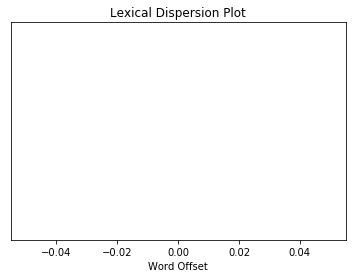

Goblet of Fire.txt


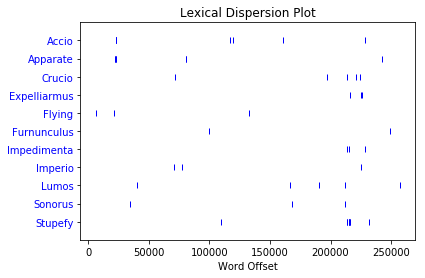

Deathly Hallows.txt


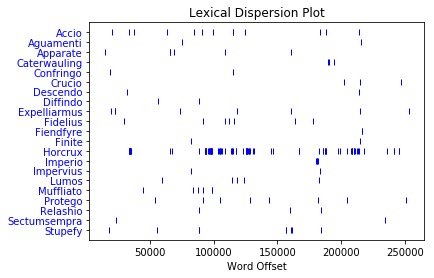

Prisoner of Azkaban.txt


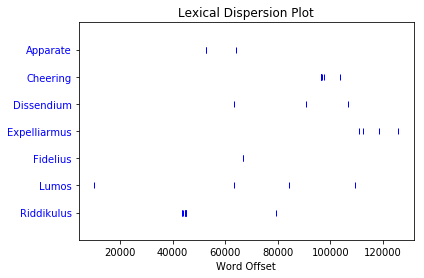

Chamber of Secrets.txt


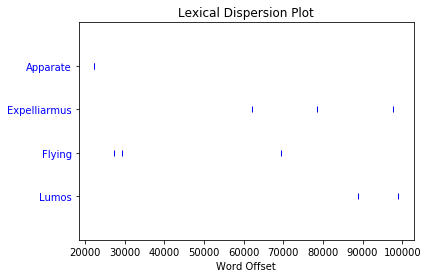

Half-Blood Prince.txt


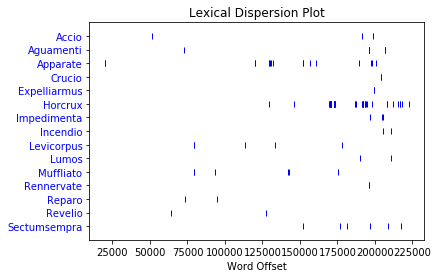

Order of the Phoenix.txt


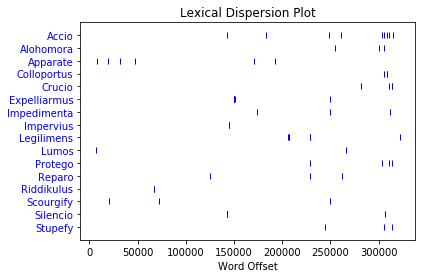

In [58]:
for chapter in all_chapters:
    spelldict = dispersion[chapter]
    relevant_spells = []
    for spell in spelldict:
        if(spelldict[spell]>1):
            relevant_spells.append(spell)
    print(chapter)
    nltk_obj = nltk.Text(all_chapters[chapter])
    nltk_obj.dispersion_plot(relevant_spells)